# Setup

In [ ]:
pip install -r ../requirements.txt

In [1]:
# Add directory above current directory to path
import sys

sys.path.insert(0, '..')

In [2]:
sys.path.remove(
    '/home/es/es_es/es_kamait02/.local/lib/python3.9/site-packages')
sys.path.append(
    '/home/es/es_es/es_kamait02/.local/lib/python3.9/site-packages')

In [3]:
import pandas as pd
import numpy as np
import os
import gzip
import glob
import json
from tqdm import tqdm
from data_loader.abo import ABO

In [4]:
path = "../datasets/abo"

# Downloading data

The ABO dataset is available at https://amazon-berkeley-objects.s3.amazonaws.com/index.html

Here we want to preprocess and view the data ourselves, so we set `preprocess=False`

In [66]:
ABO(path=path, download=True, extract=True, preprocess=False)

abo-listings.tar already exists.
Extracting abo-listings.tar...
abo-images-small.tar already exists.
Extracting abo-images-small.tar...


# Load images

In [5]:
with gzip.open(os.path.join(path, 'images/metadata/images.csv.gz')) as f:
    images_meta = pd.read_csv(f)
images_meta.head()

,image_id,height,width,path
0,010-mllS7JL,106,106,14/14fe8812.jpg
1,01dkn0Gyx0L,122,122,da/daab0cad.jpg
2,01sUPg0387L,111,111,d2/d2daaae9.jpg
3,1168jc-5r1L,186,186,3a/3a4e88e6.jpg
4,11RUV5Fs65L,30,500,d9/d91ab9cf.jpg


In [6]:
images_meta.shape

(398212, 4)

In [7]:
images_meta.isna().sum()

image_id    0
height      0
width       0
path        0
dtype: int64

# Load texts

In the following section, we manually concatenate all the JSON listings in `./datasets/abo/listings`.

This one-time process can be time-consuming, taking >30-60 minutes to complete, depending on disk speed. To make things more convenient, we already provide the resulting file in gzip format: [`listings.csv.gz`](../datasets/abo/listings/listings.csv.gz).

Therefore, you may skip ahead to [section "Import listings CSV"](#import-listings-csv).

In [5]:
json_pattern = os.path.join(path, 'listings/metadata/listings_*.json.gz')
print(json_pattern)
file_list = glob.glob(json_pattern)
dfs = []

for f in file_list:
    with gzip.open(f) as f2:
        data = pd.read_json(f2, lines=True)
        print(f, len(data))
        for i, row in tqdm(data.iterrows(), total=data.shape[0]):
            dfs2 = []
            for k in row.keys():
                if (type(row[k]) is list):
                    if (type(row[k][0]) is dict):
                        dfs2.append(
                            pd.json_normalize(row[k][0]).add_prefix(k + "."))
                    else:
                        dfs2.append(pd.DataFrame({k: [row[k]]}))
                else:
                    dfs2.append(pd.DataFrame({k: [row[k]]}))
            dfs.append(dfs2)

./datasets/abo/listings/metadata/listings_*.json
./datasets/abo/listings/metadata/listings_a.json 9232


100%|██████████| 9232/9232 [01:21<00:00, 113.35it/s]


./datasets/abo/listings/metadata/listings_6.json 9232


100%|██████████| 9232/9232 [01:18<00:00, 117.30it/s]


./datasets/abo/listings/metadata/listings_c.json 9232


100%|██████████| 9232/9232 [01:17<00:00, 118.98it/s]


./datasets/abo/listings/metadata/listings_7.json 9232


100%|██████████| 9232/9232 [01:16<00:00, 120.60it/s]


./datasets/abo/listings/metadata/listings_3.json 9232


100%|██████████| 9232/9232 [01:18<00:00, 117.65it/s]


./datasets/abo/listings/metadata/listings_d.json 9232


100%|██████████| 9232/9232 [01:20<00:00, 114.65it/s]


./datasets/abo/listings/metadata/listings_4.json 9232


100%|██████████| 9232/9232 [01:20<00:00, 114.08it/s]


./datasets/abo/listings/metadata/listings_0.json 9232


100%|██████████| 9232/9232 [01:13<00:00, 125.10it/s]


./datasets/abo/listings/metadata/listings_2.json 9232


100%|██████████| 9232/9232 [01:24<00:00, 109.47it/s]


./datasets/abo/listings/metadata/listings_e.json 9232


100%|██████████| 9232/9232 [01:14<00:00, 124.70it/s]


./datasets/abo/listings/metadata/listings_b.json 9232


100%|██████████| 9232/9232 [01:26<00:00, 106.67it/s]


./datasets/abo/listings/metadata/listings_f.json 9222


100%|██████████| 9222/9222 [01:13<00:00, 126.11it/s]


./datasets/abo/listings/metadata/listings_5.json 9232


100%|██████████| 9232/9232 [01:14<00:00, 124.48it/s]


./datasets/abo/listings/metadata/listings_9.json 9232


100%|██████████| 9232/9232 [01:29<00:00, 103.48it/s]


./datasets/abo/listings/metadata/listings_8.json 9232


100%|██████████| 9232/9232 [01:13<00:00, 125.15it/s]


./datasets/abo/listings/metadata/listings_1.json 9232


100%|██████████| 9232/9232 [01:14<00:00, 124.19it/s]


Serializing as pickle may take too long. Recommend exporting to CSV instead, it is much faster.

In [ ]:
# import pickle
# with open("dfs", "wb") as fp:
#     pickle.dump(dfs, fp)

In [ ]:
# dfs = []

# with open("dfs", "rb") as fp:
#     dfs = pickle.load(fp)

The following two cells may also take some time.

In [6]:
dfs_1 = []

for df in tqdm(dfs):
    dfs_1.append(pd.concat(df, axis=1))

100%|██████████| 147702/147702 [02:51<00:00, 861.85it/s] 


In [7]:
dfs_2 = pd.concat(dfs_1)
dfs_2

,item_dimensions,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,...,fabric_type.value,node,item_shape.language_tag,item_shape.value,product_description.language_tag,product_description.value,finish_type.language_tag,finish_type.value,brand,item_name.alternate_representations
0,{'height': {'normalized_value': {'unit': 'inch...,es_ES,Pinzon by Amazon,es_ES,Sábana bajera ajustable - Dimensiones: 90 x 20...,es_ES,Azul,B00MGSFTLE,es_ES,"Pinzon by Amazon 'Everyday' Spannbetttuch, Bau...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,en_IN,Klepe,hi_IN,आउटर मटीरियल: PU,hi_IN,गहरा ग्रे(स्लेटी),B07WRK7NGQ,en_IN,Klepe Men's Dark Grey Running Shoes-11 UK (45 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511RJ3W,en_IN,Amazon Brand - Solimo Designer Two Different P...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511NVLY,en_IN,Amazon Brand - Solimo Designer Wooden Blocks T...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,{'height': {'normalized_value': {'unit': 'inch...,en_US,Allegro Coffee,en_US,Kosher,NaN,NaN,B078ZMFWC3,en_US,"Allegro Tea, Tea Spice Puer Yunnan Organic, 0....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,en_IN,Flavia,ml_IN,പുറമെയുള്ള മെറ്റീരിയൽ: PU,ml_IN,ഇളം ചാരനിറം,B07ZFRKDSD,ml_IN,Flavia സ്ത്രീകളുടെ Ballet ഫ്ലാറ്റ്സ് - ചാരനിറം...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,{'height': {'normalized_value': {'unit': 'inch...,de_DE,Tovess,de_DE,"Ein Premium Dry Gin, der im „Single Batch“-Des...",NaN,NaN,B07WQJ3DZ8,de_DE,"Tovess- Single Batch Crafted Gin (0,04 l)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,{'height': {'normalized_value': {'unit': 'inch...,en_US,365 Everyday Value,en_US,Produced without added hormones.,NaN,NaN,B074H65ZYT,en_US,"365 Everyday Value, Havarti Cheese, Slices, 12 oz",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,en_US,Red Wagon,en_US,Suede-effect upper,en_US,Grey,B072KWH977,en_US,"Red Wagon Girls' Muck Desert Boots, Grey, 8 us",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dfs_2["other_image_id"].notna()

0    True
0    True
0    True
0    True
0    True
     ... 
0    True
0    True
0    True
0    True
0    True
Name: other_image_id, Length: 147702, dtype: bool

In [9]:
dfs_2.reset_index(drop=True, inplace=True)
dfs_2.to_csv(os.path.join(path, "listings/listings.csv"))

## Import listings CSV

In [35]:
from ast import literal_eval

In [36]:
# dfs = pd.read_csv(os.path.join(path, "listings/listings.csv"))

with gzip.open(os.path.join(path, "listings/listings.csv.gz")) as f:
    dfs = pd.read_csv(f, dtype=object)

In [37]:
dfs = dfs.drop(['Unnamed: 0'], axis=1)
#dfs = dfs.drop(['Unnamed: 0.1'], axis=1)
dfs

,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,model_name.language_tag,...,color,pattern.language_tag,pattern.value,node,finish_type.language_tag,finish_type.value,item_shape.language_tag,item_shape.value,item_name.alternate_representations,brand
0,nl_NL,find.,nl_NL,Schoen in Loafer-stijl,nl_NL,Veelkleurig Vrouw Blauw,B06X9STHNG,nl_NL,Amazon-merk - vinden. Dames Leder Gesloten Tee...,nl_NL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,es_MX,AmazonBasics,es_MX,White Powder Coat Finish,es_MX,White Powder Coat,B07P8ML82R,es_MX,"22"" Bottom Mount Drawer Slides, White Powder C...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,en_AE,AmazonBasics,en_AE,3D printer filament with 1.75mm diameter + / -...,en_AE,Translucent Yellow,B07H9GMYXS,en_AE,"AmazonBasics PETG 3D Printer Filament, 1.75mm,...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,en_GB,Stone & Beam,NaN,NaN,en_GB,Stone Brown,B07CTPR73M,en_GB,"Stone & Beam Stone Brown Swatch, 25020039-01",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,en_AU,The Fix,en_AU,Embroidered flowers bloom against understated ...,en_AU,Havana Tan,B01MTEI8M6,en_AU,The Fix Amazon Brand Women's French Floral Emb...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147697,es_ES,AmazonBasics,es_ES,"20 l de capacidad, plato giratorio de 255 mm; ...",es_ES,Negro,B08158K336,es_ES,"AmazonBasics – Microondas de mesa básico, 20 l...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147698,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Mobile, with perfect cut-outs for...",en_IN,multi-colored,B081HNG4QN,en_IN,Amazon Brand - Solimo Designer Abstract 3D Pri...,en_IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147699,en_US,365 Everyday Value,en_US,Brought to you by Whole Foods Market. Our sta...,NaN,NaN,B074JD6D3V,en_US,"365 EVERYDAY VALUE Organic Quinoa, 16 OZ",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147700,es_MX,Stone & Beam,NaN,NaN,NaN,NaN,B07CVCTSF8,es_MX,Stone & Beam - Alfombra Informal a Cuadros,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploration

## Columns, size...

In [38]:
dfs.columns

Index(['brand.language_tag', 'brand.value', 'bullet_point.language_tag',
       'bullet_point.value', 'color.language_tag', 'color.value', 'item_id',
       'item_name.language_tag', 'item_name.value', 'model_name.language_tag',
       'model_name.value', 'model_number.value', 'model_year.value',
       'product_type.value', 'style.language_tag', 'style.value',
       'main_image_id', 'other_image_id', 'item_keywords.language_tag',
       'item_keywords.value', 'country', 'marketplace', 'domain_name',
       'node.node_id', 'node.node_name', 'item_dimensions', 'item_weight',
       'material', 'fabric_type', 'color_code', 'product_description',
       'spin_id', '3dmodel_id', 'pattern', 'finish_type', 'item_shape',
       'model_name', 'model_year', 'item_weight.unit', 'item_weight.value',
       'item_weight.normalized_value.unit',
       'item_weight.normalized_value.value', 'material.language_tag',
       'material.value', 'bullet_point', 'style', 'color.standardized_values',
      

In [39]:
dfs.shape

(147702, 63)

## Class distribution

[Text(0, 0, 'CELLULAR_PHONE_CASE'),
 Text(1, 0, 'SHOES'),
 Text(2, 0, 'GROCERY'),
 Text(3, 0, 'HOME'),
 Text(4, 0, 'HOME_BED_AND_BATH'),
 Text(5, 0, 'HOME_FURNITURE_AND_DECOR'),
 Text(6, 0, 'CHAIR'),
 Text(7, 0, 'BOOT'),
 Text(8, 0, 'SANDAL'),
 Text(9, 0, 'FINERING')]

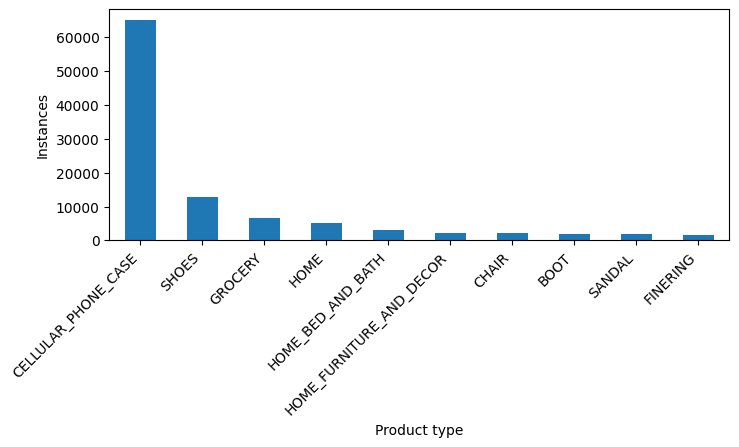

In [40]:
top_n = 10

ax = dfs.groupby(['product_type.value'
                  ]).size().sort_values(ascending=False).head(top_n).plot.bar(
                      rot=45,
                      figsize=(8, 3),
                      xlabel="Product type",
                      ylabel="Instances")
ax.set_xticklabels(ax.get_xticklabels(), ha="right")

In [41]:
dfs.groupby(['product_type.value']).size().sort_values(ascending=False)

product_type.value
CELLULAR_PHONE_CASE        64853
SHOES                      12965
GROCERY                     6546
HOME                        5264
HOME_BED_AND_BATH           3082
                           ...  
VEHICLE_SAFETY_CAMERA          1
VEHICLE_SCAN_TOOL              1
REFRIGERATION_APPLIANCE        1
TIMER                          1
SWING                          1
Length: 576, dtype: int64

# Undersample majority classes

The top 5 classes `CELLULAR_PHONE_CASE, SHOES, GROCERY, HOME, HOME_BED_AND_BATH` take more than 2% of all data, therefore we undersample them

In [42]:
(dfs['product_type.value'].value_counts().cumsum()) / len(dfs)

CELLULAR_PHONE_CASE      0.439080
SHOES                    0.526858
GROCERY                  0.571177
HOME                     0.606816
HOME_BED_AND_BATH        0.627683
                           ...   
WAIST_CINCHER            0.999973
KICK_SCOOTER             0.999980
LEHENGA_CHOLI_SET        0.999986
AV_RECEIVER              0.999993
WIRELESS_LOCKED_PHONE    1.000000
Name: product_type.value, Length: 576, dtype: float64

In [43]:
(dfs['product_type.value'].value_counts()[:20].cumsum()) / len(dfs)

CELLULAR_PHONE_CASE           0.439080
SHOES                         0.526858
GROCERY                       0.571177
HOME                          0.606816
HOME_BED_AND_BATH             0.627683
HOME_FURNITURE_AND_DECOR      0.642950
CHAIR                         0.657168
BOOT                          0.670770
SANDAL                        0.683261
FINERING                      0.693687
HEALTH_PERSONAL_CARE          0.703498
FINENECKLACEBRACELETANKLET    0.712820
ACCESSORY                     0.722042
SOFA                          0.730159
OFFICE_PRODUCTS               0.737959
FINEEARRING                   0.745657
PET_SUPPLIES                  0.752860
SPORTING_GOODS                0.759441
TABLE                         0.765778
HARDWARE_HANDLE               0.771601
Name: product_type.value, dtype: float64

In [44]:
majority_cls = dfs['product_type.value'].value_counts()[:5].index.tolist()
majority_cls

['CELLULAR_PHONE_CASE', 'SHOES', 'GROCERY', 'HOME', 'HOME_BED_AND_BATH']

In [45]:
# Undersample to average of all classes

def undersample(df, cls):
    return pd.concat([df[df['product_type.value'] != cls],
                      df[df['product_type.value'] == cls].sample(int(df['product_type.value'].value_counts().mean()))
                      ]).reset_index(drop=True)

In [46]:
for cls in majority_cls:
    dfs = undersample(dfs, cls)

dfs

,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,model_name.language_tag,...,color,pattern.language_tag,pattern.value,node,finish_type.language_tag,finish_type.value,item_shape.language_tag,item_shape.value,item_name.alternate_representations,brand
0,es_MX,AmazonBasics,es_MX,White Powder Coat Finish,es_MX,White Powder Coat,B07P8ML82R,es_MX,"22"" Bottom Mount Drawer Slides, White Powder C...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,en_AE,AmazonBasics,en_AE,3D printer filament with 1.75mm diameter + / -...,en_AE,Translucent Yellow,B07H9GMYXS,en_AE,"AmazonBasics PETG 3D Printer Filament, 1.75mm,...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,en_GB,Stone & Beam,NaN,NaN,en_GB,Stone Brown,B07CTPR73M,en_GB,"Stone & Beam Stone Brown Swatch, 25020039-01",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,en_US,AmazonBasics,en_US,"Lead-free glass: made of crystal-clear, lead-f...",en_US,Clear,B0896LJNLH,en_US,AmazonBasics Serene 16-Piece Old Fashioned and...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,en_GB,UMI,en_GB,Product Detail: Package include 6 pieces of ch...,en_GB,Peacock Blue,B07R51S57D,en_GB,UMI by Amazon 6 PCS Stretch Dining Chair Cover...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55720,de_DE,UMI,nl_NL,Wand-badhanddoekhouder voor dagelijks comfort ...,de_DE,Polished,B07D54Z8V7,nl_NL,Umi. Essentials badhanddoekhouder met dubbele ...,NaN,...,NaN,NaN,NaN,NaN,de_DE,Poliert,NaN,NaN,NaN,NaN
55721,it_IT,Rivet,NaN,NaN,NaN,NaN,B07T8KPQ5H,it_IT,Rivet - Set Copripiumino per Letto Matrimonial...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55722,en_US,AmazonBasics,en_US,Supple 100% polyester microfiber bed skirt,en_US,Dark Grey,B0798JBYQG,en_US,"AmazonBasics Pleated Bed Skirt - Queen, Dark Grey",NaN,...,NaN,en_US,Skirt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55723,fr_FR,Pinzon by Amazon,fr_FR,1 drap inclus,fr_FR,Taupe,B00M92JC0G,fr_FR,Pinzon by Amazon Drap en microfibre Taupe 280 ...,NaN,...,NaN,fr_FR,Uni,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Text augmentation

As per [Zhang et al. (2015)](https://dl.acm.org/doi/10.5555/2969239.2969312):

"To decide on how many words to replace, we extract all replaceable words from the given text and randomly choose r of them to be replaced. The probability of number r is determined by a geometric distribution with parameter p in which P[r]∼p^r. The index s of the synonym chosen given a word is also determined by another geometric distribution in which P[s] ∼ q^s. This way, the probability of a synonym chosen becomes smaller when it moves distant from the most frequently seen meaning. We will report the results using this new data augmentation technique with p = 0.5 and q = 0.5"

In [47]:
import random
import nltk

In [48]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/es/es_es/es_kamait02/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/es/es_es/es_kamait02/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/es/es_es/es_kamait02/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [49]:
from nltk.corpus import wordnet as wn

In [50]:
def get_synonyms(word):
    synonyms = set()
    for synset in wn.synsets(word):
        for lemma in synset.lemmas():
            synonyms.add(lemma.name().replace('_', ' '))
    return list(synonyms)

def replace_words_with_synonyms(text, p=0.5, q=0.5):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    
    # Extract replaceable words (nouns, verbs, adjectives, and adverbs)
    replaceable_words = [word for word, pos in nltk.pos_tag(words) if pos.startswith('NN') or pos.startswith('VB') or pos.startswith('JJ') or pos.startswith('RB')]
    
    # Randomly choose a word replacement count 'r' using a geometric distribution with parameter 'p'
    r = np.random.geometric(p)
    
    for _ in range(r):
        if len(replaceable_words) > 0:
            # Randomly choose the index 's' of the synonym using a geometric distribution with parameter 'q'
            s = np.random.geometric(q)
            s = min(s, len(replaceable_words) - 1)
            
            word_to_replace = random.choice(replaceable_words)
            synonyms = get_synonyms(word_to_replace)
            
            if synonyms:
                # Replace the selected word with the synonym
                new_word = random.choice(synonyms)
                text = text.replace(word_to_replace, new_word, 1)
                
                # Remove the word from the list of replaceable words to avoid replacing it again
                replaceable_words.remove(word_to_replace)
    
    return text

In [51]:
text = "To decide on how many words to replace, we extract all replaceable words from the given text and randomly choose r of them to be replaced. The probability of number r is determined by a geometric distribution with parameter p in which P[r]∼p^r. The index s of the synonym chosen given a word is also determined by another geometric distribution in which P[s] ∼ q^s. This way, the probability of a synonym chosen becomes smaller when it moves distant from the most frequently seen meaning. We will report the results using this new data augmentation technique with p = 0.5 and q = 0.5."

augmented_text = replace_words_with_synonyms(text, p=0.5, q=0.5)

print(text)
print(augmented_text)
print(text == augmented_text)

To decide on how many words to replace, we extract all replaceable words from the given text and randomly choose r of them to be replaced. The probability of number r is determined by a geometric distribution with parameter p in which P[r]∼p^r. The index s of the synonym chosen given a word is also determined by another geometric distribution in which P[s] ∼ q^s. This way, the probability of a synonym chosen becomes smaller when it moves distant from the most frequently seen meaning. We will report the results using this new data augmentation technique with p = 0.5 and q = 0.5.
To decide on how many words to replace, we extract all replaceable words from the given text and randomly choose r of them to be replaced. The probability of number r is determined by a geometric distribution with parameter p in which P[r]∼p^r. The index s of the synonym chosen given a word is also determined by another geometric distribution in which P[s] ∼ q^s. This way, the probability of a synonym chosen bec

In [52]:
dfs_augmented = dfs.copy()

In [53]:
dfs_augmented["item_keywords.value"] = dfs_augmented["item_keywords.value"].fillna("")

In [54]:
# This may take a few minutes

dfs_augmented["item_name.value"] = dfs_augmented["item_name.value"].apply(lambda x: replace_words_with_synonyms(x, p=0.5, q=0.5))

In [55]:
dfs_augmented["item_keywords.value"] = dfs_augmented["item_keywords.value"].apply(lambda x: replace_words_with_synonyms(x, p=0.5, q=0.5))

In [56]:
dfs = pd.concat([dfs, dfs_augmented])

# Augmentation with alternative product images

In [57]:
dfs["other_image_id"] = dfs["other_image_id"].fillna("[]")

In [58]:
dfs["other_image_id"] = dfs["other_image_id"].apply(literal_eval)

In [59]:
dfs_3 = dfs.explode(["other_image_id"])

In [60]:
dfs_3["main_image_id"] = dfs_3["other_image_id"]

In [61]:
dfs = pd.concat([dfs, dfs_3])
dfs

,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,model_name.language_tag,...,color,pattern.language_tag,pattern.value,node,finish_type.language_tag,finish_type.value,item_shape.language_tag,item_shape.value,item_name.alternate_representations,brand
0,es_MX,AmazonBasics,es_MX,White Powder Coat Finish,es_MX,White Powder Coat,B07P8ML82R,es_MX,"22"" Bottom Mount Drawer Slides, White Powder C...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,en_AE,AmazonBasics,en_AE,3D printer filament with 1.75mm diameter + / -...,en_AE,Translucent Yellow,B07H9GMYXS,en_AE,"AmazonBasics PETG 3D Printer Filament, 1.75mm,...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,en_GB,Stone & Beam,NaN,NaN,en_GB,Stone Brown,B07CTPR73M,en_GB,"Stone & Beam Stone Brown Swatch, 25020039-01",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,en_US,AmazonBasics,en_US,"Lead-free glass: made of crystal-clear, lead-f...",en_US,Clear,B0896LJNLH,en_US,AmazonBasics Serene 16-Piece Old Fashioned and...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,en_GB,UMI,en_GB,Product Detail: Package include 6 pieces of ch...,en_GB,Peacock Blue,B07R51S57D,en_GB,UMI by Amazon 6 PCS Stretch Dining Chair Cover...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55724,en_IN,Amazon Brand - Solimo,hi_IN,"सॉफ्ट, आरामदायक और हलके वज़न की रिवर्सिबल रजाई ...",kn_IN,motivation 114,B076BS83BT,kn_IN,amazon Brand - Solimo ಮೈಕ್ರೋಫೈಬರ್ ರಿವರ್ಸಿಬಲ್ ಕ...,NaN,...,NaN,en_IN,Comforter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55724,en_IN,Amazon Brand - Solimo,hi_IN,"सॉफ्ट, आरामदायक और हलके वज़न की रिवर्सिबल रजाई ...",kn_IN,motivation 114,B076BS83BT,kn_IN,amazon Brand - Solimo ಮೈಕ್ರೋಫೈಬರ್ ರಿವರ್ಸಿಬಲ್ ಕ...,NaN,...,NaN,en_IN,Comforter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55724,en_IN,Amazon Brand - Solimo,hi_IN,"सॉफ्ट, आरामदायक और हलके वज़न की रिवर्सिबल रजाई ...",kn_IN,motivation 114,B076BS83BT,kn_IN,amazon Brand - Solimo ಮೈಕ್ರೋಫೈಬರ್ ರಿವರ್ಸಿಬಲ್ ಕ...,NaN,...,NaN,en_IN,Comforter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55724,en_IN,Amazon Brand - Solimo,hi_IN,"सॉफ्ट, आरामदायक और हलके वज़न की रिवर्सिबल रजाई ...",kn_IN,motivation 114,B076BS83BT,kn_IN,amazon Brand - Solimo ಮೈಕ್ರೋಫೈಬರ್ ರಿವರ್ಸಿಬಲ್ ಕ...,NaN,...,NaN,en_IN,Comforter,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
dfs.reset_index(drop=True, inplace=True)
dfs

,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,model_name.language_tag,...,color,pattern.language_tag,pattern.value,node,finish_type.language_tag,finish_type.value,item_shape.language_tag,item_shape.value,item_name.alternate_representations,brand
0,es_MX,AmazonBasics,es_MX,White Powder Coat Finish,es_MX,White Powder Coat,B07P8ML82R,es_MX,"22"" Bottom Mount Drawer Slides, White Powder C...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,en_AE,AmazonBasics,en_AE,3D printer filament with 1.75mm diameter + / -...,en_AE,Translucent Yellow,B07H9GMYXS,en_AE,"AmazonBasics PETG 3D Printer Filament, 1.75mm,...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,en_GB,Stone & Beam,NaN,NaN,en_GB,Stone Brown,B07CTPR73M,en_GB,"Stone & Beam Stone Brown Swatch, 25020039-01",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,en_US,AmazonBasics,en_US,"Lead-free glass: made of crystal-clear, lead-f...",en_US,Clear,B0896LJNLH,en_US,AmazonBasics Serene 16-Piece Old Fashioned and...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,en_GB,UMI,en_GB,Product Detail: Package include 6 pieces of ch...,en_GB,Peacock Blue,B07R51S57D,en_GB,UMI by Amazon 6 PCS Stretch Dining Chair Cover...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577161,en_IN,Amazon Brand - Solimo,hi_IN,"सॉफ्ट, आरामदायक और हलके वज़न की रिवर्सिबल रजाई ...",kn_IN,motivation 114,B076BS83BT,kn_IN,amazon Brand - Solimo ಮೈಕ್ರೋಫೈಬರ್ ರಿವರ್ಸಿಬಲ್ ಕ...,NaN,...,NaN,en_IN,Comforter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577162,en_IN,Amazon Brand - Solimo,hi_IN,"सॉफ्ट, आरामदायक और हलके वज़न की रिवर्सिबल रजाई ...",kn_IN,motivation 114,B076BS83BT,kn_IN,amazon Brand - Solimo ಮೈಕ್ರೋಫೈಬರ್ ರಿವರ್ಸಿಬಲ್ ಕ...,NaN,...,NaN,en_IN,Comforter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577163,en_IN,Amazon Brand - Solimo,hi_IN,"सॉफ्ट, आरामदायक और हलके वज़न की रिवर्सिबल रजाई ...",kn_IN,motivation 114,B076BS83BT,kn_IN,amazon Brand - Solimo ಮೈಕ್ರೋಫೈಬರ್ ರಿವರ್ಸಿಬಲ್ ಕ...,NaN,...,NaN,en_IN,Comforter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577164,en_IN,Amazon Brand - Solimo,hi_IN,"सॉफ्ट, आरामदायक और हलके वज़न की रिवर्सिबल रजाई ...",kn_IN,motivation 114,B076BS83BT,kn_IN,amazon Brand - Solimo ಮೈಕ್ರೋಫೈಬರ್ ರಿವರ್ಸಿಬಲ್ ಕ...,NaN,...,NaN,en_IN,Comforter,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Verify balanced class distribution

[Text(0, 0, 'HOME_FURNITURE_AND_DECOR'),
 Text(1, 0, 'CHAIR'),
 Text(2, 0, 'SANDAL'),
 Text(3, 0, 'BOOT'),
 Text(4, 0, 'HEALTH_PERSONAL_CARE'),
 Text(5, 0, 'SOFA'),
 Text(6, 0, 'PET_SUPPLIES'),
 Text(7, 0, 'TABLE'),
 Text(8, 0, 'OFFICE_PRODUCTS'),
 Text(9, 0, 'HARDWARE_HANDLE')]

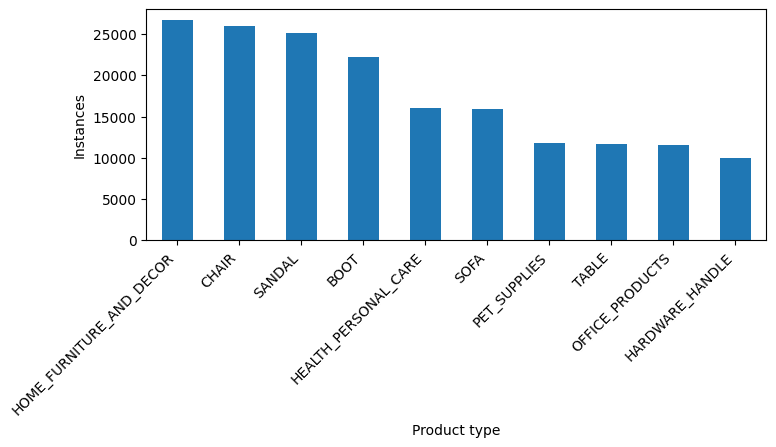

In [64]:
top_n = 10

ax = dfs.groupby(['product_type.value'
                  ]).size().sort_values(ascending=False).head(top_n).plot.bar(
                      rot=45,
                      figsize=(8, 3),
                      xlabel="Product type",
                      ylabel="Instances")
ax.set_xticklabels(ax.get_xticklabels(), ha="right")

# Ground truth

In [65]:
listings_new = dfs[[
    "item_keywords.value", "brand.value", "item_id", "item_name.language_tag",
    "item_name.value", "product_type.value", "product_description.value",
    "main_image_id"
]]

## Merge images and texts

In [66]:
ground_truth = listings_new.merge(images_meta,
                                  left_on='main_image_id',
                                  right_on='image_id')

## Copy columns for experiments on extended MNN-EM

In [67]:
ground_truth["item_keywords.value2"] = ground_truth["item_keywords.value"]
ground_truth["item_id2"] = ground_truth["item_id"]
ground_truth["item_name.value2"] = ground_truth["item_name.value"]

## Target labels for MNN-EM

In [68]:
ground_truth["label"] = 1

In [69]:
ground_truth.head(10)

,item_keywords.value,brand.value,item_id,item_name.language_tag,item_name.value,product_type.value,product_description.value,main_image_id,image_id,height,width,path,item_keywords.value2,item_id2,item_name.value2,label
0,22,AmazonBasics,B07P8ML82R,es_MX,"22"" Bottom Mount Drawer Slides, White Powder C...",HARDWARE,NaN,619y9YG9cnL,619y9YG9cnL,1200,1200,9f/9f76d27b.jpg,22,B07P8ML82R,"22"" Bottom Mount Drawer Slides, White Powder C...",1
1,NaN,AmazonBasics,B01MS9NPOE,tr_TR,"AmazonBasics – Avrupa çekmece rayları, alt tar...",HARDWARE,NaN,619y9YG9cnL,619y9YG9cnL,1200,1200,9f/9f76d27b.jpg,NaN,B01MS9NPOE,"AmazonBasics – Avrupa çekmece rayları, alt tar...",1
2,22,AmazonBasics,B07P8ML82R,es_MX,"22"" Bottom Mount draftsman Slides, White Powde...",HARDWARE,NaN,619y9YG9cnL,619y9YG9cnL,1200,1200,9f/9f76d27b.jpg,22,B07P8ML82R,"22"" Bottom Mount draftsman Slides, White Powde...",1
3,,AmazonBasics,B01MS9NPOE,tr_TR,"AmazonBasics – Avrupa çekmece rayları, EL tara...",HARDWARE,NaN,619y9YG9cnL,619y9YG9cnL,1200,1200,9f/9f76d27b.jpg,,B01MS9NPOE,"AmazonBasics – Avrupa çekmece rayları, EL tara...",1
4,3d printer filament,AmazonBasics,B07H9GMYXS,en_AE,"AmazonBasics PETG 3D Printer Filament, 1.75mm,...",MECHANICAL_COMPONENTS,NaN,81NP7qh2L6L,81NP7qh2L6L,2492,2492,66/665cc994.jpg,3d printer filament,B07H9GMYXS,"AmazonBasics PETG 3D Printer Filament, 1.75mm,...",1
5,3d printer strand,AmazonBasics,B07H9GMYXS,en_AE,"AmazonBasics PETG 3D Printer fibril, 1.75mm, 1...",MECHANICAL_COMPONENTS,NaN,81NP7qh2L6L,81NP7qh2L6L,2492,2492,66/665cc994.jpg,3d printer strand,B07H9GMYXS,"AmazonBasics PETG 3D Printer fibril, 1.75mm, 1...",1
6,love,Stone & Beam,B07CTPR73M,en_GB,"Stone & Beam Stone Brown Swatch, 25020039-01",SOFA,NaN,61Rp4qOih9L,61Rp4qOih9L,500,500,b4/b4f9d0cc.jpg,love,B07CTPR73M,"Stone & Beam Stone Brown Swatch, 25020039-01",1
7,sleep with,Stone & Beam,B07CTPR73M,en_GB,"endocarp & Beam Stone Brown Swatch, 25020039-01",SOFA,NaN,61Rp4qOih9L,61Rp4qOih9L,500,500,b4/b4f9d0cc.jpg,sleep with,B07CTPR73M,"endocarp & Beam Stone Brown Swatch, 25020039-01",1
8,crystal,AmazonBasics,B0896LJNLH,en_US,AmazonBasics Serene 16-Piece Old Fashioned and...,DRINKING_CUP,NaN,61izEZdhlaL,61izEZdhlaL,1197,894,07/075e5d67.jpg,crystal,B0896LJNLH,AmazonBasics Serene 16-Piece Old Fashioned and...,1
9,crystallization,AmazonBasics,B0896LJNLH,en_US,AmazonBasics tranquil 16-Piece Old Fashioned a...,DRINKING_CUP,NaN,61izEZdhlaL,61izEZdhlaL,1197,894,07/075e5d67.jpg,crystallization,B0896LJNLH,AmazonBasics tranquil 16-Piece Old Fashioned a...,1


In [70]:
ground_truth[ground_truth["item_id"] == "B07TBV5BY9"]

,item_keywords.value,brand.value,item_id,item_name.language_tag,item_name.value,product_type.value,product_description.value,main_image_id,image_id,height,width,path,item_keywords.value2,item_id2,item_name.value2,label


# False samples/Complement

In [71]:
false_samples = ground_truth.apply(np.random.permutation, axis=0)

## Target labels for MNN-EM

In [72]:
false_samples["label"] = 0

In [73]:
false_samples.head(10)

,item_keywords.value,brand.value,item_id,item_name.language_tag,item_name.value,product_type.value,product_description.value,main_image_id,image_id,height,width,path,item_keywords.value2,item_id2,item_name.value2,label
0,studio apartment,Rivet,B07GF4MX46,en_US,亚马逊基本款轮毂刷短把手2件套,BREAD,NaN,A1RV8k9SmpL,71SkAPR1ZRL,1000,2560,39/39065061.jpg,minor,B07DHRTX91,"365 Everyday Value, Vitamin D3 1000 IU, 250 ct",0
1,リング 立方晶ジルコニア エンゲージメント バンド ソリティア ハロー 宝石 結婚式 結晶 ...,Amazon Elements,B074JP4G8X,en_US,AmazonBasics Rubber Horseshoe Set,HOME_FURNITURE_AND_DECOR,NaN,8108wU2rpML,71vQdyyjQDL,585,1942,5c/5cae599e.jpg,flavia,B0853XDZYK,"Amazon Brand – Stone & Beam Polypropylene Rug,...",0
2,ES,Rivet,B079DD9FTX,en_CA,AmazonBasics klassisk mottagning kontorsstol m...,SPORTING_GOODS,NaN,61+imMW0YsL,81rzh83Mj0L,1200,2560,16/162b7a61.jpg,,B07FFVNKTC,"AmazonCommercial Over/under Knee Pads, 8.5 in,...",0
3,amazon,AmazonBasics,B0831PV6X6,en_CA,Amazon Brand - Happy Belly Roasted & Salted Ca...,OFFICE_PRODUCTS,NaN,91VASeV19XL,41QFIKK+rFL,1000,1160,64/64aed606.jpg,tv wall bracket 55 inch 50 mount brackets,B07VXW1P2V,AmazonBasics DECT Home Telephone Set of 3 Black,0
4,ladestation ps4 controller zubehÃr fÃ¼r playst...,AmazonBasics,B084CC5ZVQ,zh_CN,"AmazonBasics 2-weg radioapparaat, PMR, walkiet...",BEAUTY,NaN,71iuUvwyTjL,71UOZArUzAL,2560,1422,7f/7f875188.jpg,lounge,B07W7WRM52,"AmazonBasics Cat Condo Ottoman, Khaki",0
5,スーツケース キャリーケース キャリーバッグ スーツケース 機内持込 スーツケース 大型 キ...,AmazonBasics,B0797DZWZL,fr_FR,"Ravenna Home Peterson 现代玻璃橱柜存储电视媒体娱乐架, 玻璃 松木",TABLE,NaN,61mledfMpRL,71Far7oIBJL,2560,2560,2e/2e7835b8.jpg,nightstand,B07CPD2H9Z,Amazon Brand - The pay off womanhood's Giana O...,0
6,,AmazonBasics,B081ZK5BL7,zh_CN,"Eono Amazon Brand Grote vouwbare wasmand, inkl...",FURNITURE_COVER,NaN,71hwRckN-wL,61naobz2BeL,2560,2560,4e/4e592ea9.jpg,Placeholder,B07GDWV4PK,Basic Care Lidocaine Men's Desensitizing Spray...,0
7,alera,Amazonベーシック(AmazonBasics),B07QCQ3HYZ,en_GB,Amazon Brand - find. Women's Sandals in Leathe...,SHOES,NaN,71tG31MrQPL,71UMFSecDPL,2560,2050,cd/cd5b3037.jpg,dutch oven; cast iron dutch oven; lodge cast iron,B07F1RGQTR,Amazon Brand – Stone & Beam Rosemont sofá vint...,0
8,air fresheners for car,AmazonBasics,B07GHB5G9F,nl_NL,Amazon Brand - Solimo Full Body Tempered meth ...,FILE_FOLDER,NaN,41qY2ycBIlL,51y3S5Y2mjL,2000,2560,0c/0c460747.jpg,NaN,B07L1L2MB4,"Amazon Essentials - Portafoglio da uomo, sotti...",0
9,NaN,Rivet,B00BIBQJ3M,en_GB,"AmazonBasics - Manubri in vinile, 7 Libbre (3,...",HANDBAG,NaN,31S6IRHWxCL,61fxSSQEdjL,1001,2560,ec/ec810c92.jpg,NaN,B07DVRLW1N,"Stone & Beam 复古浴室梳妆台灯带玻璃灯罩, IVL729A04CH",0


# Combine ground truth and complement

In [74]:
dataset = pd.concat([ground_truth, false_samples])

In [75]:
# random shuffle
dataset_final = dataset.sample(frac=1, axis=0).reset_index(drop=True)

## Drop unneeded columns

In [76]:
dataset_final = dataset_final.drop([
    "main_image_id", "image_id", "height", "width", "product_description.value"
],
                                   axis=1)

In [77]:
dataset_final

,item_keywords.value,brand.value,item_id,item_name.language_tag,item_name.value,product_type.value,path,item_keywords.value2,item_id2,item_name.value2,label
0,Grocery Dairy milk Non-Organic Milk Grocery & ...,OTTO Leather,B07XG3Q264,en_GB,Amazon Brand – Rivet Turquoise Blue Crystal Ka...,CHAIR,66/66f3a68c.jpg,classic With A Twist,B07GQZCBZ3,Stone & Beam Jane Wood-Framed Classic Woven Di...,0
1,canape convertible 2 places canapÃ d'angle lit,AmazonBasics,B01FN7XAYW,ko_KR,"UMI. Essentials fotoalbum 13x18 met vlinder, i...",LAMP,9a/9ad9ebf7.jpg,UK,B07HSH9W9Y,Amazon-Marke: Presto! Pods Color-Waschmittel ...,0
2,"Nero 0,9 m cavi cavi sound video",AmazonBasics,B015P0Q486,it_IT,AmeterazonBasics - Cavo DisplayPort su Display...,COMPUTER_COMPONENT,ee/ee9d3113.jpg,"Nero 0,9 m cavi cavi sound video",B015P0Q486,AmeterazonBasics - Cavo DisplayPort su Display...,1
3,fathers day gifts for dad,206 Collective,B078GT8DNT,en_AU,206 Collective Amazon Brand Men's Greenlake Do...,SANDAL,78/78245151.jpg,fathers day gifts for dad,B078GT8DNT,206 Collective Amazon Brand Men's Greenlake Do...,1
4,NaN,Right2Home,B07F2M2VGG,zh_CN,Amazon 品牌 - Ravenna Home Sage 钻石簇绒脚凳，91.44 厘米宽,OTTOMAN,b0/b0e0dfe1.jpg,NaN,B07F2M2VGG,Amazon 品牌 - Ravenna Home Sage 钻石簇绒脚凳，91.44 厘米宽,1
...,...,...,...,...,...,...,...,...,...,...,...
1128643,little,Rivet,B07B8P1JCT,zh_CN,铆钉现代金属架,SHELF,42/42dcc90c.jpg,little,B07B8P1JCT,铆钉现代金属架,1
1128644,Frau yoga - hose bauch kontrolle hohe taillier...,Amazon Collection(アマゾンコレクション),B07T8G3D49,it_IT,Waterproof Winter Gloves for Women and Men War...,SAFETY_SUPPLY,31/311bd2c6.jpg,lidschatten-palette,B01ABLZSZE,"The Fix Sutton Round Toe Ankle Boot Bottine, V...",0
1128645,support ecran triple bureau assis debout 3 pc ...,Allegro Coffee,B07TJ1CJJS,es_MX,Amazon Brand - Solimo Square Silicone Cupcake ...,OUTDOOR_LIVING,1a/1a542a2d.jpg,trita documenti 12 fogli carta docente prodott...,B0757YFKYB,AmazonBasics portable Stereo Boombox with CD P...,0
1128646,Grocery Frozen Fruit Fruit Grocery & Gourmet F...,365 by Whole Foods Market,B0812L12VX,en_US,"365 by Whole Foods Market, Frozen Organic Wild...",FRUIT,08/086e15ce.jpg,Grocery Frozen Fruit Fruit Grocery & Gourmet F...,B0812L12VX,"365 by Whole Foods Market, Frozen Organic Wild...",1


## Select only english articles

In [78]:
dataset_final = dataset_final.loc[
    (dataset_final['item_name.language_tag'] == "en_US") |
    (dataset_final['item_name.language_tag'] == "en_GB") |
    (dataset_final['item_name.language_tag'] == "en_IN")]

In [79]:
dataset_final = dataset_final.drop(["brand.value", "item_name.language_tag"],
                                   axis=1)

In [80]:
dataset_final = dataset_final.reset_index(drop=True)

In [81]:
dataset_final

,item_keywords.value,item_id,item_name.value,product_type.value,path,item_keywords.value2,item_id2,item_name.value2,label
0,Grocery Dairy milk Non-Organic Milk Grocery & ...,B07XG3Q264,Amazon Brand – Rivet Turquoise Blue Crystal Ka...,CHAIR,66/66f3a68c.jpg,classic With A Twist,B07GQZCBZ3,Stone & Beam Jane Wood-Framed Classic Woven Di...,0
1,sideboards for living room melanize sideboard ...,B07S62N11B,"Amazon trademark - Movian 2-Door Display Unit,...",CABINET,72/720ee1c5.jpg,sideboards for living room melanize sideboard ...,B07S62N11B,"Amazon trademark - Movian 2-Door Display Unit,...",1
2,low,B07QCQ1H1V,AmazonBasics LED E14 Small Edison Screw Applia...,HEADBOARD,c0/c0fc7ece.jpg,sedia da gaming ufficio poltrona ergonomica sc...,B087S5LWCJ,AmazonBasics - Archivador de anillas redondo d...,0
3,handwash,B07RQL4BN2,"Amazon Brand - Solimo handwash Liquid, Neem & ...",HEALTH_PERSONAL_CARE,63/638b6719.jpg,handwash,B07RQL4BN2,"Amazon Brand - Solimo handwash Liquid, Neem & ...",1
4,NaN,B07HYYBHW1,Amazon Brand - Solimo പ്ലാസ്റ്റിക് കിച്ചൻ സ്റ്...,FINERING,7f/7fb4ec4e.jpg,studio apartment,B07DP4JJ5S,"AmazonBasics 25 Watt Equivalent, Clear, Non-D...",0
...,...,...,...,...,...,...,...,...,...
341831,artwork,B073P23TT2,Amazon Brand – Stone & Beam Contemporary Blue ...,WALL_ART,e5/e515dd46.jpg,artwork,B073P23TT2,Amazon Brand – Stone & Beam Contemporary Blue ...,1
341832,recliner,B07QCMBKN8,Amazon Brand – Stone & Beam Anne Marie Contemp...,HOME_FURNITURE_AND_DECOR,ee/ee9b72ec.jpg,recliner,B07QCMBKN8,Amazon Brand – Stone & Beam Anne Marie Contemp...,1
341833,shredder,B08B7XRSS1,AmazonBasics Course Hand Grater with Stainless...,KITCHEN,ff/ffea8934.jpg,shredder,B08B7XRSS1,AmazonBasics Course Hand Grater with Stainless...,1
341834,,B07X6V951H,AmazonBasics Kraft Brown Shipping Labels 5-1/2...,LABEL,ac/ac55d014.jpg,,B07X6V951H,AmazonBasics Kraft Brown Shipping Labels 5-1/2...,1


## Random deletion of attributes

In [82]:
dataset_final.isnull().sum()

item_keywords.value     34408
item_id                     0
item_name.value             0
product_type.value          0
path                        0
item_keywords.value2    34388
item_id2                    0
item_name.value2            0
label                       0
dtype: int64

In [83]:
dataset_final.loc[dataset_final["item_keywords.value"].sample(frac=.5).index]

,item_keywords.value,item_id,item_name.value,product_type.value,path,item_keywords.value2,item_id2,item_name.value2,label
256046,cama para perros calmante perro relajante anti...,B00TOAGK06,Amazon Brand – Stone & Beam Rustic Woven Frame...,NUTS,c9/c9d3d062.jpg,,B074MH3FM1,AmazonCommercial dissolvable All-Purpose clean...,0
286866,classics,B07B4MRJ6F,"Lutrovita Fiber Mix Gummy, Strawberry, Peach, ...",JANITORIAL_SUPPLY,f2/f2cba812.jpg,sedia da gaming scrivania ufficio poltrona erg...,B01GRYK4IA,"Amazon Elements Baby Wipes, Fresh, 720 Count, ...",0
241563,,B083QVP13D,Presto! theme towel,HEALTH_PERSONAL_CARE,6a/6a375aa2.jpg,,B083QVP13D,Presto! theme towel,1
299776,Placeholder,B081SG63CT,Amazon Brand - Solimo Tucana എഞ്ചിനീയേർഡ് വുഡ്...,HOME_FURNITURE_AND_DECOR,74/74152e5d.jpg,almuerzo,B0725GYNG6,[Amazon Collection] Amazon Collection 镀铑纯银 透明立...,0
152294,Birthstones,B082834911,"Amazon Brand - Vedaka Fennel Seeds (Saunf), 50g",COMPUTER_ADD_ON,8d/8d83c9c4.jpg,pedale di distorsione per chitarra,B082GL11DJ,"Amazon Brand - Movian 3-Drawer Desk, 120 x 74 ...",0
...,...,...,...,...,...,...,...,...,...
298072,yoga blocks foam yoga head block black yoga bl...,B07D55GT6Q,UMI. by Amazon - Yoga Blocks High Density Ligh...,SPORTING_GOODS,a8/a83e16be.jpg,yoga blocks foam yoga head block black yoga bl...,B07D55GT6Q,UMI. by Amazon - Yoga Blocks High Density Ligh...,1
18758,,B07Y31Y4KP,"AmazonBasics pliant Stackable Kids Chairs, Bla...",HOME_FURNITURE_AND_DECOR,4c/4cc4a222.jpg,,B07Y31Y4KP,"AmazonBasics pliant Stackable Kids Chairs, Bla...",1
36044,backyard games,B07B4M26ZJ,Amazon CollectionColgante de plata de ley con ...,BATTERY,d5/d563adc6.jpg,バレンタインクリスマスニューイヤープレゼントギフトペンダントネックレスプラチナロジウムバラゴ...,B00FXW7WM4,AmazonBasics SX-75QTYB Faitout en fonte émaill...,0
2365,NaN,B07HPHGGBR,"basic tutelage Hemorrhoidal unguent, 2 Oz",SANDAL,9e/9e8acae8.jpg,checkin luggage,B0714MJKX2,"AmazonCommercial över/under knäskydd, 8,6 cm, ...",0


In [84]:
dataset_final["item_keywords.value"] = dataset_final[
    "item_keywords.value"].sample(frac=.5)
dataset_final["item_id"] = dataset_final["item_id"].sample(frac=.5)
dataset_final["item_name.value"] = dataset_final["item_name.value"].sample(
    frac=.5)

In [85]:
dataset_final["item_keywords.value2"] = dataset_final[
    "item_keywords.value2"].sample(frac=.5)
dataset_final["item_id2"] = dataset_final["item_id2"].sample(frac=.5)
dataset_final["item_name.value2"] = dataset_final["item_name.value2"].sample(
    frac=.5)

In [86]:
dataset_final.isnull().sum()

item_keywords.value     188128
item_id                 170918
item_name.value         170918
product_type.value           0
path                         0
item_keywords.value2    188192
item_id2                170918
item_name.value2        170918
label                        0
dtype: int64

In [87]:
# dataset_final = dataset_final.dropna()     # if random deletion isn't used, execute this line instead
dataset_final = dataset_final.fillna("")

## Concatenate attributes into description columns

`description` is used for MNN-EM and MNN-BTL, while `description2` is used for Extended MNN-EM

In [88]:
dataset_final["description"] = dataset_final[
    "item_keywords.value"] + dataset_final["item_id"] + dataset_final[
        "item_name.value"]  # + dataset_final["product_type.value"]

In [89]:
dataset_final["description2"] = dataset_final[
    "item_keywords.value2"] + dataset_final["item_id2"] + dataset_final[
        "item_name.value2"]  # + dataset_final["product_type.value"]

In [90]:
dataset_final['product_type'] = dataset_final['product_type.value']

In [91]:
dataset_final = dataset_final[[
    "description", "description2", "path", "label", "product_type"
]]

In [92]:
dataset_final

,description,description2,path,label,product_type
0,B07XG3Q264Amazon Brand – Rivet Turquoise Blue ...,B07GQZCBZ3,66/66f3a68c.jpg,0,CHAIR
1,,sideboards for living room melanize sideboard ...,72/720ee1c5.jpg,1,CABINET
2,AmazonBasics LED E14 Small Edison Screw Applia...,AmazonBasics - Archivador de anillas redondo d...,c0/c0fc7ece.jpg,0,HEADBOARD
3,"handwashAmazon Brand - Solimo handwash Liquid,...",handwashB07RQL4BN2,63/638b6719.jpg,1,HEALTH_PERSONAL_CARE
4,B07HYYBHW1Amazon Brand - Solimo പ്ലാസ്റ്റിക് ക...,studio apartmentAmazonBasics 25 Watt Equivalen...,7f/7fb4ec4e.jpg,0,FINERING
...,...,...,...,...,...
341831,artworkB073P23TT2,artworkB073P23TT2Amazon Brand – Stone & Beam C...,e5/e515dd46.jpg,1,WALL_ART
341832,,B07QCMBKN8Amazon Brand – Stone & Beam Anne Mar...,ee/ee9b72ec.jpg,1,HOME_FURNITURE_AND_DECOR
341833,shredderAmazonBasics Course Hand Grater with S...,shredderB08B7XRSS1,ff/ffea8934.jpg,1,KITCHEN
341834,,B07X6V951H,ac/ac55d014.jpg,1,LABEL


Because the [random deletion](#random-deletion-of-attributes) is performed for each column, it may occur that all attributes may be empty at the same time. Therefore we drop all rows with empty descriptions

In [93]:
np.where(dataset_final['description2'] == '')[0]

array([    10,     11,     24, ..., 341813, 341820, 341827])

In [94]:
dataset_final = dataset_final.drop(
    np.where((dataset_final['description'] == '')
             | (dataset_final['description2'] == ''))[0])
dataset_final

,description,description2,path,label,product_type
0,B07XG3Q264Amazon Brand – Rivet Turquoise Blue ...,B07GQZCBZ3,66/66f3a68c.jpg,0,CHAIR
2,AmazonBasics LED E14 Small Edison Screw Applia...,AmazonBasics - Archivador de anillas redondo d...,c0/c0fc7ece.jpg,0,HEADBOARD
3,"handwashAmazon Brand - Solimo handwash Liquid,...",handwashB07RQL4BN2,63/638b6719.jpg,1,HEALTH_PERSONAL_CARE
4,B07HYYBHW1Amazon Brand - Solimo പ്ലാസ്റ്റിക് ക...,studio apartmentAmazonBasics 25 Watt Equivalen...,7f/7fb4ec4e.jpg,0,FINERING
5,artworkB073P1CJS1,artworkB073P1CJS1Amazon Brand – Stone & Beam M...,b7/b79b7aaf.jpg,1,WALL_ART
...,...,...,...,...,...
341828,bed,dining-chairsB07BL73DGR,ab/ab5c4845.jpg,0,SOFA
341830,"Amazon Brand - Stone & Beam Carrigan 休闲客厅椅,45 ...","365 Everyday Value, Chelated Iron 18mg, 100 Co...",07/0758aa64.jpg,0,PORTABLE_ELECTRONIC_DEVICE_MOUNT
341831,artworkB073P23TT2,artworkB073P23TT2Amazon Brand – Stone & Beam C...,e5/e515dd46.jpg,1,WALL_ART
341833,shredderAmazonBasics Course Hand Grater with S...,shredderB08B7XRSS1,ff/ffea8934.jpg,1,KITCHEN


In [95]:
dataset_final.isnull().sum()

description     0
description2    0
path            0
label           0
product_type    0
dtype: int64

## Set descriptions to lowercase

As per [Zhang et al. (2015)](https://dl.acm.org/doi/10.5555/2969239.2969312)

In [96]:
dataset_final["description"] = dataset_final["description"].str.lower()

In [97]:
dataset_final["description2"] = dataset_final["description2"].str.lower()

In [98]:
dataset_final

,description,description2,path,label,product_type
0,b07xg3q264amazon brand – rivet turquoise blue ...,b07gqzcbz3,66/66f3a68c.jpg,0,CHAIR
2,amazonbasics led e14 small edison screw applia...,amazonbasics - archivador de anillas redondo d...,c0/c0fc7ece.jpg,0,HEADBOARD
3,"handwashamazon brand - solimo handwash liquid,...",handwashb07rql4bn2,63/638b6719.jpg,1,HEALTH_PERSONAL_CARE
4,b07hyybhw1amazon brand - solimo പ്ലാസ്റ്റിക് ക...,studio apartmentamazonbasics 25 watt equivalen...,7f/7fb4ec4e.jpg,0,FINERING
5,artworkb073p1cjs1,artworkb073p1cjs1amazon brand – stone & beam m...,b7/b79b7aaf.jpg,1,WALL_ART
...,...,...,...,...,...
341828,bed,dining-chairsb07bl73dgr,ab/ab5c4845.jpg,0,SOFA
341830,"amazon brand - stone & beam carrigan 休闲客厅椅,45 ...","365 everyday value, chelated iron 18mg, 100 co...",07/0758aa64.jpg,0,PORTABLE_ELECTRONIC_DEVICE_MOUNT
341831,artworkb073p23tt2,artworkb073p23tt2amazon brand – stone & beam c...,e5/e515dd46.jpg,1,WALL_ART
341833,shredderamazonbasics course hand grater with s...,shredderb08b7xrss1,ff/ffea8934.jpg,1,KITCHEN


## Remove non-ASCII characters

In [99]:
dataset_final["description"] = dataset_final['description'].str.replace(
    r'[^\x00-\x7F]+', '', regex=True)
dataset_final["description2"] = dataset_final['description2'].str.replace(
    r'[^\x00-\x7F]+', '', regex=True)

In [100]:
dataset_final.dropna()

,description,description2,path,label,product_type
0,b07xg3q264amazon brand rivet turquoise blue c...,b07gqzcbz3,66/66f3a68c.jpg,0,CHAIR
2,amazonbasics led e14 small edison screw applia...,amazonbasics - archivador de anillas redondo d...,c0/c0fc7ece.jpg,0,HEADBOARD
3,"handwashamazon brand - solimo handwash liquid,...",handwashb07rql4bn2,63/638b6719.jpg,1,HEALTH_PERSONAL_CARE
4,"b07hyybhw1amazon brand - solimo , 750 ml, ...",studio apartmentamazonbasics 25 watt equivalen...,7f/7fb4ec4e.jpg,0,FINERING
5,artworkb073p1cjs1,artworkb073p1cjs1amazon brand stone & beam mo...,b7/b79b7aaf.jpg,1,WALL_ART
...,...,...,...,...,...
341828,bed,dining-chairsb07bl73dgr,ab/ab5c4845.jpg,0,SOFA
341830,"amazon brand - stone & beam carrigan ,45 ( 113...","365 everyday value, chelated iron 18mg, 100 co...",07/0758aa64.jpg,0,PORTABLE_ELECTRONIC_DEVICE_MOUNT
341831,artworkb073p23tt2,artworkb073p23tt2amazon brand stone & beam co...,e5/e515dd46.jpg,1,WALL_ART
341833,shredderamazonbasics course hand grater with s...,shredderb08b7xrss1,ff/ffea8934.jpg,1,KITCHEN


In [101]:
dataset_final = dataset_final.reset_index(drop=True)

In [102]:
dataset_final

,description,description2,path,label,product_type
0,b07xg3q264amazon brand rivet turquoise blue c...,b07gqzcbz3,66/66f3a68c.jpg,0,CHAIR
1,amazonbasics led e14 small edison screw applia...,amazonbasics - archivador de anillas redondo d...,c0/c0fc7ece.jpg,0,HEADBOARD
2,"handwashamazon brand - solimo handwash liquid,...",handwashb07rql4bn2,63/638b6719.jpg,1,HEALTH_PERSONAL_CARE
3,"b07hyybhw1amazon brand - solimo , 750 ml, ...",studio apartmentamazonbasics 25 watt equivalen...,7f/7fb4ec4e.jpg,0,FINERING
4,artworkb073p1cjs1,artworkb073p1cjs1amazon brand stone & beam mo...,b7/b79b7aaf.jpg,1,WALL_ART
...,...,...,...,...,...
247048,bed,dining-chairsb07bl73dgr,ab/ab5c4845.jpg,0,SOFA
247049,"amazon brand - stone & beam carrigan ,45 ( 113...","365 everyday value, chelated iron 18mg, 100 co...",07/0758aa64.jpg,0,PORTABLE_ELECTRONIC_DEVICE_MOUNT
247050,artworkb073p23tt2,artworkb073p23tt2amazon brand stone & beam co...,e5/e515dd46.jpg,1,WALL_ART
247051,shredderamazonbasics course hand grater with s...,shredderb08b7xrss1,ff/ffea8934.jpg,1,KITCHEN


## Export dataset

In [103]:
dataset_final.to_csv(os.path.join(path, "data.csv"))

In [104]:
dataset_final = pd.read_csv(os.path.join(path, "data.csv"))
dataset_final = dataset_final.drop(['Unnamed: 0'], axis=1)
dataset_final

,description,description2,path,label,product_type
0,b07xg3q264amazon brand rivet turquoise blue c...,b07gqzcbz3,66/66f3a68c.jpg,0,CHAIR
1,amazonbasics led e14 small edison screw applia...,amazonbasics - archivador de anillas redondo d...,c0/c0fc7ece.jpg,0,HEADBOARD
2,"handwashamazon brand - solimo handwash liquid,...",handwashb07rql4bn2,63/638b6719.jpg,1,HEALTH_PERSONAL_CARE
3,"b07hyybhw1amazon brand - solimo , 750 ml, ...",studio apartmentamazonbasics 25 watt equivalen...,7f/7fb4ec4e.jpg,0,FINERING
4,artworkb073p1cjs1,artworkb073p1cjs1amazon brand stone & beam mo...,b7/b79b7aaf.jpg,1,WALL_ART
...,...,...,...,...,...
247048,bed,dining-chairsb07bl73dgr,ab/ab5c4845.jpg,0,SOFA
247049,"amazon brand - stone & beam carrigan ,45 ( 113...","365 everyday value, chelated iron 18mg, 100 co...",07/0758aa64.jpg,0,PORTABLE_ELECTRONIC_DEVICE_MOUNT
247050,artworkb073p23tt2,artworkb073p23tt2amazon brand stone & beam co...,e5/e515dd46.jpg,1,WALL_ART
247051,shredderamazonbasics course hand grater with s...,shredderb08b7xrss1,ff/ffea8934.jpg,1,KITCHEN


# Misc

## Positive sample

For each image, there is exactly one matching description.

For all positive samples (`label == 1`): all attributes (`description`, `description2`, `path`, `product_type`) are matching.

For all negative samples (`label == 0`): all attributes (`description`, `description2`, `path`, `product_type`) are randomly shuffled.

In [105]:
pos_samples = dataset_final[(dataset_final["path"] == "35/35f0a7ac.jpg") & (dataset_final["label"] == 1)]
pos_samples

,description,description2,path,label,product_type


In [106]:
pos_samples["description"].tolist()

[]

In [107]:
pos_samples["description2"].tolist()

[]

In [108]:
from IPython.display import Image, display

In [ ]:
display(Image(os.path.join(path, "images/small", pos_samples["path"].iloc[0])))

## Negative sample

In [ ]:
neg_samples = dataset_final[(dataset_final["path"] == "a6/a6aa41af.jpg") & (dataset_final["label"] == 0)]
neg_samples

,description,description2,path,label,product_type
51960,mobile coverb07zp89dcbamazon brand - solimo de...,back coverb07b4yzfgwamazon brand - solimo desi...,a6/a6aa41af.jpg,0,CELLULAR_PHONE_CASE


In [ ]:
neg_samples["description"].tolist()

['mobile coverb07zp89dcbamazon brand - solimo designer quotes uv printed soft back case mobile cover for micromax yu yunique 2']

In [ ]:
neg_samples["description2"].tolist()

['back coverb07b4yzfgwamazon brand - solimo designer white flower uv printed soft back case mobile cover for oppo a5 (2020)']

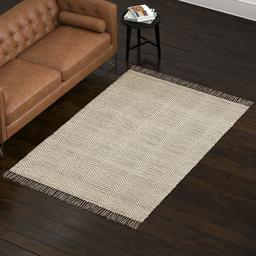

In [ ]:
display(Image(os.path.join(path, "images/small", neg_samples["path"].iloc[0])))

### corresponding positive sample to above image

In [ ]:
pos_sample = dataset_final[(dataset_final["path"] == "a6/a6aa41af.jpg") & (dataset_final["label"] == 1)]
pos_sample["description"].tolist()

['smallb07hss5rnlamazon brand  rivet modern textured area rug, 5 x 8 foot, grey, white']